# The Expectations of Squid Game
## Season 1

This notebook will explore details regarding probabilities and expectations in Squid Game.

## Hyperparameters

In [1]:
NUMBER_OF_PLAYERS = 1000
SECONDS_PER_GAME = 60 * 3

## Game 1: Red Light, Green Light

We can model the problem as follows:

- Each player must traverse a distance of $d$ meters in $t$ seconds
- The players each have a peak velocity and acceleration pulled from a normal distribution.
- The player must stop when the doll says "Red Light"
- The probability that a person does not stop when the doll says "Red Light" is inversely proportional to the 

In [2]:
import numpy as np
import random
from tqdm import tqdm

res = []

for _ in tqdm(range(10**4)):

    # Parameters
    num_players = NUMBER_OF_PLAYERS
    field_length = 360  # in feet
    initial_interval_time = 10  # seconds
    time_decrement = 0.2  # seconds
    min_interval_time = 2  # seconds

    # Generate player stats: peak velocity (ft/s) and acceleration (ft/s^2)
    def generate_player_stats():
        peak_velocity = np.random.normal(loc=22, scale=3)  # Mean: 22 ft/s, SD: 3 ft/s
        acceleration = np.random.normal(loc=10, scale=2)   # Mean: 10 ft/s², SD: 2 ft/s²
        return max(0.1, peak_velocity), max(0.1, acceleration)

    players = [generate_player_stats() for _ in range(num_players)]

    # Calculate movement probability based on interval time
    def calculate_movement_probability(interval_time):
        return max(0.1, 1 / interval_time)  # Minimum probability of moving is set to 0.1

    # Simulation variables
    positions = np.zeros(num_players)      # Player positions on the field
    eliminated = np.zeros(num_players, dtype=bool)  # Track eliminated players
    remaining_players = num_players
    interval_time = initial_interval_time

    # Game simulation loop
    while remaining_players > 1 and interval_time >= min_interval_time:
        # Green Light Phase: Players move forward based on their stats
        for i, (velocity, accel) in enumerate(players):
            if not eliminated[i]:
                time_to_max_speed = velocity / accel
                if time_to_max_speed <= interval_time:
                    distance = (0.5 * accel * time_to_max_speed**2) + (velocity * (interval_time - time_to_max_speed))
                else:
                    distance = 0.5 * accel * interval_time**2
                
                positions[i] += distance
                
                # Cap position at the field length
                if positions[i] >= field_length:
                    positions[i] = field_length
                    remaining_players -= 1

        # Red Light Phase: Check for rule violations
        for i in range(num_players):
            if not eliminated[i] and positions[i] < field_length:
                prob_move = calculate_movement_probability(interval_time)
                if random.random() < prob_move:  # Player moves when they shouldn't
                    eliminated[i] = True
                    remaining_players -= 1

        # Decrease interval time for the next round
        interval_time = max(min_interval_time, interval_time - time_decrement)

    # Determine winners (players who reached the finish line or survived)
    winners = [i for i in range(num_players) if not eliminated[i] and positions[i] >= field_length]
    res.append(num_players - len(winners))

100%|██████████| 10000/10000 [00:51<00:00, 194.19it/s]


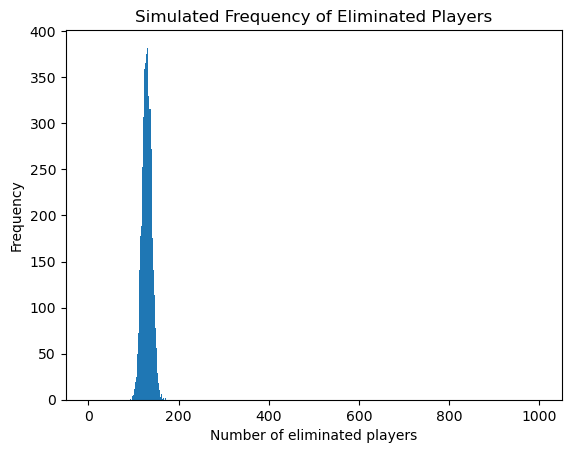

In [3]:
from matplotlib import pyplot as plt
plt.hist(res, bins=range(0, NUMBER_OF_PLAYERS+1))
plt.xlabel("Number of eliminated players")
plt.ylabel("Frequency")
plt.title("Simulated Frequency of Eliminated Players")
plt.show()

## Game 2: Honeycomb

We can model the game as follows:
- Each player picks a shape from a set $\text{Shapes} := \set{\text{Triangle}, \text{Circle}, \text{Star}, \text{Umbrella}}$
- The probability of cutting each shape, by chance alone, is $\mathbb{P}[\text{random cut } s \in \text{Shapes}] = \begin{cases}0.98\, & \textbf{if }s=\text{Triangle}\\ 0.6\, & \textbf{if } s = \text{Circle}\\ 0.4 \, & \textbf{if }s=\text{Star}\\ 0.05 \, & \textbf{if }s=\text{Umbrella}\end{cases}$
- Each player is given a skill level from a normal distribution centered at $0.7$ with a standard deviation of $0.1$

In [4]:
import numpy as np
from tqdm import tqdm

# Define shapes and their base probabilities of success
shapes = ["Triangle", "Circle", "Star", "Umbrella"]
shape_probabilities = {
    "Triangle": 0.98,
    "Circle": 0.6,
    "Star": 0.4,
    "Umbrella": 0.05
}
res = []
for _ in tqdm(range(10**4)):
    # Number of players
    num_players = NUMBER_OF_PLAYERS

    # Generate skill levels for players from a normal distribution
    mean_skill = 0.7
    std_dev_skill = 0.1
    skill_levels = np.random.normal(loc=mean_skill, scale=std_dev_skill, size=num_players)

    # Clip skill levels to [0, 1]
    skill_levels = np.clip(skill_levels, 0, 1)

    # Randomly assign shapes to players
    player_shapes = np.random.choice(shapes, size=num_players)

    # Function to calculate success for a player
    def calculate_success(player_shape, player_skill):
        base_probability = shape_probabilities[player_shape]
        return np.random.random() < (base_probability * player_skill)

    # Simulate the game for all players
    results = []
    for i in range(num_players):
        player_shape = player_shapes[i]
        player_skill = skill_levels[i]
        success = calculate_success(player_shape, player_skill)
        results.append((player_shape, player_skill, success))

    # Count overall outcomes
    success_count = sum(1 for _, _, success in results if success)
    failure_count = num_players - success_count
    res.append(failure_count)

    # Group results by shape
    # shape_outcomes = {shape: {"success": 0, "failure": 0} for shape in shapes}
    # for player_shape, _, success in results:
    #     if success:
    #         shape_outcomes[player_shape]["success"] += 1
    #     else:
    #         shape_outcomes[player_shape]["failure"] += 1

# # Output overall results and shape-specific outcomes
# print(f"Total Successes: {success_count}")
# print(f"Total Failures: {failure_count}")
# print("Outcomes by Shape:")
# for shape, outcome in shape_outcomes.items():
#     print(f"  {shape}: {outcome['success']} successes, {outcome['failure']} failures")


100%|██████████| 10000/10000 [00:12<00:00, 810.64it/s]


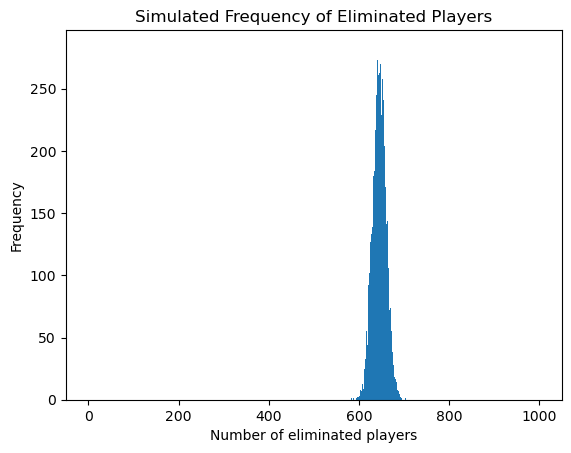

In [5]:
from matplotlib import pyplot as plt
plt.hist(res, bins=range(0, NUMBER_OF_PLAYERS+1))
plt.xlabel("Number of eliminated players")
plt.ylabel("Frequency")
plt.title("Simulated Frequency of Eliminated Players")
plt.show()

## Game 3: Tug of War
Since tug of war is a zero sum game, there is nothing much to simulate. 50% of the population will perish deterministically.

## Game 4: Marbles

Same here. Nothing much to simulate. 50% of the population will perish deterministically.

## Game 5: Glass Stepping Stones

- There are $n$ glass stepping stones, each with a probability of breaking $0.5$
- The player must get across the stepping stones in $t$ seconds. But for sake of simplicity, we will assume that each player has unlimited time

In [8]:
import numpy as np
from tqdm import tqdm

res = []
for _ in tqdm(range(10**6)):
    # Example parameters
    num_players = NUMBER_OF_PLAYERS  # Number of players
    num_stones = 50    # Number of stones in the path

    num_elminiated = 0
    for player in range(num_players):
        i = 0
        while i < num_stones:
            i += 1
            if np.random.random() < 0.5:
                num_elminiated += 1
                break
        num_stones -= i
    res.append(num_elminiated)

100%|██████████| 1000000/1000000 [00:44<00:00, 22439.27it/s]


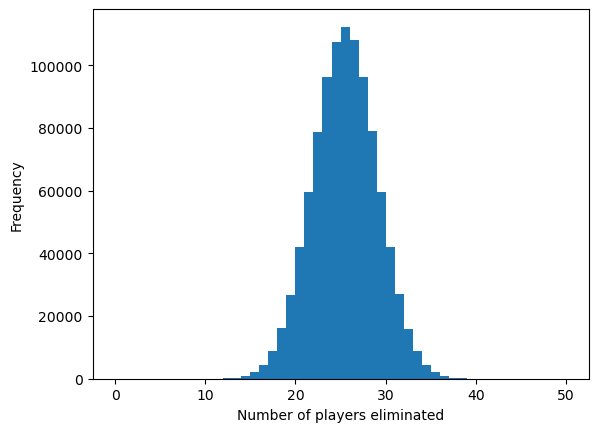

In [9]:
from matplotlib import pyplot as plt
plt.hist(res, bins=range(0, 51))
plt.xlabel('Number of players eliminated')
plt.ylabel('Frequency')
plt.show()

### Mathematical Analysis

We know that there is a $0.5$ probability that a player will fall into the pit. By the geometric distribution, we know that the expected number of steps to reach the first break is $\frac{1}{p} = 2$. So every player will take an expectation of $2$ steps.

Let $X$ denote the number of players eliminated. We have the following formula for the expectation:

$$\mathbb{E}[X] = \frac{n}{2}$$

## Game 6: Squid Game

Yeah idk